In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 1) Read the dataset

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Project/Student-performance-UCI/Datasets/student_combined.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      1044 non-null   object
 1   sex         1044 non-null   object
 2   age         1044 non-null   int64 
 3   address     1044 non-null   object
 4   famsize     1044 non-null   object
 5   Pstatus     1044 non-null   object
 6   Medu        1044 non-null   int64 
 7   Fedu        1044 non-null   int64 
 8   Mjob        1044 non-null   object
 9   Fjob        1044 non-null   object
 10  reason      1044 non-null   object
 11  guardian    1044 non-null   object
 12  traveltime  1044 non-null   int64 
 13  studytime   1044 non-null   int64 
 14  failures    1044 non-null   int64 
 15  schoolsup   1044 non-null   object
 16  famsup      1044 non-null   object
 17  paid        1044 non-null   object
 18  activities  1044 non-null   object
 19  nursery     1044 non-null   object
 20  higher  

Getter functions for multiple label encoders

In [4]:
import matplotlib.ticker as mtick
def plot_hist_and_box(x_variable, df):

  # create subplots with 1 row and 2 columns
  fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(15, 10))

  # plot distplot on the first subplot
  ax1 = sns.histplot(data=df, x=x_variable, kde=False, discrete = True, ax=axs[0])
  axs[0].set_title('Distribution of {}'.format(x_variable))
  axs[0].set_xlabel("{} Variables".format(x_variable))

  # iterate over the patches and add count labels
  for patch in ax1.patches:
      height = patch.get_height()
      ax1.text(patch.get_x() + patch.get_width() / 2, height, f'{int(height)}', ha='center', va='bottom')

  # set xticks as unique values from the histogram plot
  unique_values = sorted(df[x_variable].unique())
  ax1.set_xticks(unique_values)
  ax1.xaxis.set_major_locator(mtick.FixedLocator(unique_values))

  # plot boxplot on the second subplot
  ax2 = sns.boxplot(x=df[x_variable], y=df['G3'], ax=axs[1])
  axs[1].set_title('Boxplot of {} column'.format(x_variable))
  axs[1].set_xlabel("{} Variables".format(x_variable))
  axs[1].set_ylabel("Student Score(G3)")

  # show the plots
  plt.show()

## 2) What is the distribution of the grades in the dataset? 

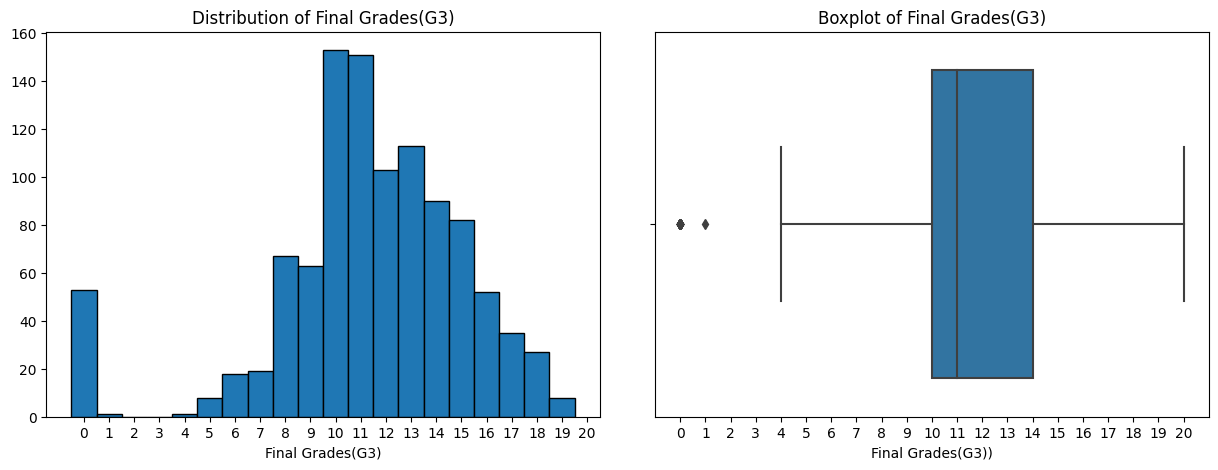

In [5]:
# create subplots with 1 row and 2 columns
fig, axs = plt.subplots(ncols=2, figsize=(15,5))

# plot distplot on the first subplot

axs[0].set_title('Distribution of Final Grades(G3)')
# set the x-axis label
axs[0].set_xlabel("Final Grades(G3)")

# calculate the bin edges and bin width for the histogram
hist_values, bin_edges, _ = axs[0].hist(df['G3'], bins=20, edgecolor='black')
bin_width = bin_edges[1] - bin_edges[0]

# shift the bin edges by half of the bin width
bin_edges_shifted = bin_edges + bin_width / 2

# set the x-axis tick locations and labels for the first subplot
axs[0].set_xticks(bin_edges_shifted)
axs[0].set_xticklabels(bin_edges_shifted.astype(int))

# plot boxplot on the second subplot
sns.boxplot(data=df, x='G3', ax=axs[1])
axs[1].set_title('Boxplot of Final Grades(G3)')
axs[1].set_xlabel("Final Grades(G3))")

# set the x-axis tick locations and labels for the second subplot
axs[1].set_xticks(range(21))
axs[1].set_xticklabels(range(21))

# adjust the spacing between subplots
plt.subplots_adjust(wspace=0.1)

# show the plots
plt.show()

Observations
* We could see that the median grade for math and portguese is 11. 

## 3) Is there a difference in scores for math and portuguese subjects between gender and age?

In [6]:
# Filter the DataFrame for math and Portuguese scores separately
math_scores = df[df['subject'] == 'Math']
portuguese_scores = df[df['subject'] == 'Portuguese']

# Calculate the mean scores for each gender and subject
math_scores_mean = math_scores.groupby(['sex','age'])['G3'].mean()

# Create a DataFrame from the mean scores
df_mean_scores = pd.DataFrame(math_scores_mean).reset_index()
df_mean_scores.columns = ['sex', 'age', 'math_mean_score']
# Replace 'F' with 'Female' and 'M' with 'Male' in the age column
df_mean_scores['sex'] = df_mean_scores['sex'].replace({'F': 'Female', 'M': 'Male'})
df_mean_scores.head(n = 5)

,sex,age,math_mean_score
0,Female,15,9.552632
1,Female,16,10.537037
2,Female,17,10.482759
3,Female,18,9.325581
4,Female,19,8.357143


In [7]:
portuguese_scores_mean = portuguese_scores.groupby(['sex','age'])['G3'].mean()

# Create a DataFrame from the mean scores
df_mean_scores1 = pd.DataFrame(portuguese_scores_mean).reset_index()
df_mean_scores1.columns = ['sex', 'age', 'portuguese_mean_score']
# Replace 'F' with 'Female' and 'M' with 'Male' in the age column
df_mean_scores1['sex'] = df_mean_scores1['sex'].replace({'F': 'Female', 'M': 'Male'})
df_mean_scores1.head(n =5)

,sex,age,portuguese_mean_score
0,Female,15,12.000000
1,Female,16,12.419048
2,Female,17,12.884956
3,Female,18,12.047619
4,Female,19,9.368421


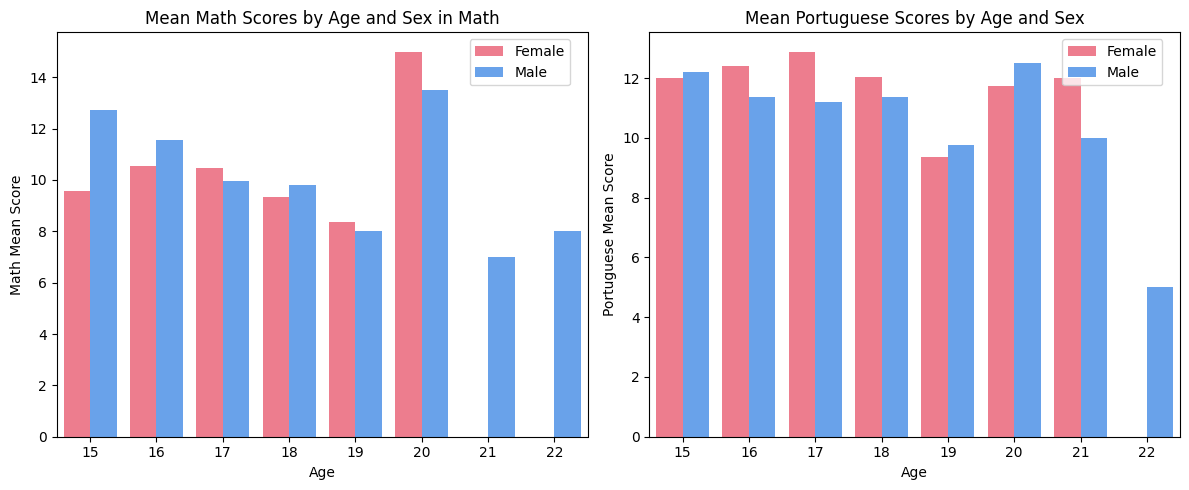

In [8]:
# Create subplots with 1 row and 2 columns
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Define the color palette for the plot
colors = {'Female': '#FF6B81', 'Male': '#54a0ff'}

# Plot the first bar plot on the first subplot
sns.barplot(data=df_mean_scores, x='age', y='math_mean_score', hue='sex', palette=colors, ax=axs[0])
axs[0].set_title('Mean Math Scores by Age and Sex in Math')
axs[0].set_xlabel('Age')
axs[0].set_ylabel('Math Mean Score')
axs[0].legend(loc='upper right', bbox_to_anchor=(0.98, 1))

# Plot the second bar plot on the second subplot
sns.barplot(data=df_mean_scores1, x='age', y='portuguese_mean_score', hue='sex',
            palette=colors, ax=axs[1])
axs[1].set_title('Mean Portuguese Scores by Age and Sex')
axs[1].set_xlabel('Age')
axs[1].set_ylabel('Portuguese Mean Score')
axs[1].legend(loc='upper right', bbox_to_anchor=(0.98, 1))

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

Observations
* We could see that the mean score for math decreases gradually for both genders. Age 20 is the anomaly in the mean math score. 
* Male outperforms female in the mean math score from 15 to 19 years of age.
* From 15 to 18, the mean score for portuguese is higher for female compared to male. However, the male overtakes the female in mean portuguese score from 18 to 19 years of age.

## 4) Is there a difference in scores by schools between gender and age?

In [9]:
# Filter the DataFrame for math and Portuguese scores separately
GP_school = df[df['school'] == 'GP']
MS_school = df[df['school'] == 'MS']

# Calculate the mean scores for each gender and subject
GP_scores_mean = GP_school.groupby(['sex','age'])['G3'].mean()

# Create a DataFrame from the mean scores
df_mean_scores = pd.DataFrame(GP_scores_mean).reset_index()
df_mean_scores.columns = ['sex', 'age', 'mean_score']
# Replace 'F' with 'Female' and 'M' with 'Male' in the age column
df_mean_scores['sex'] = df_mean_scores['sex'].replace({'F': 'Female', 'M': 'Male'})
df_mean_scores.head(n = 5)

,sex,age,mean_score
0,Female,15,10.937500
1,Female,16,11.787611
2,Female,17,12.451613
3,Female,18,11.532468
4,Female,19,9.954545


In [10]:
MS_scores_mean = MS_school.groupby(['sex','age'])['G3'].mean()

# Create a DataFrame from the mean scores
df_mean_scores1 = pd.DataFrame(MS_scores_mean).reset_index()
df_mean_scores1.columns = ['sex', 'age', 'mean_score']
# Replace 'F' with 'Female' and 'M' with 'Male' in the age column
df_mean_scores1['sex'] = df_mean_scores1['sex'].replace({'F': 'Female', 'M': 'Male'})
df_mean_scores1.head(n =5)

,sex,age,mean_score
0,Female,15,11.466667
1,Female,16,11.760870
2,Female,17,11.063830
3,Female,18,10.500000
4,Female,19,6.909091


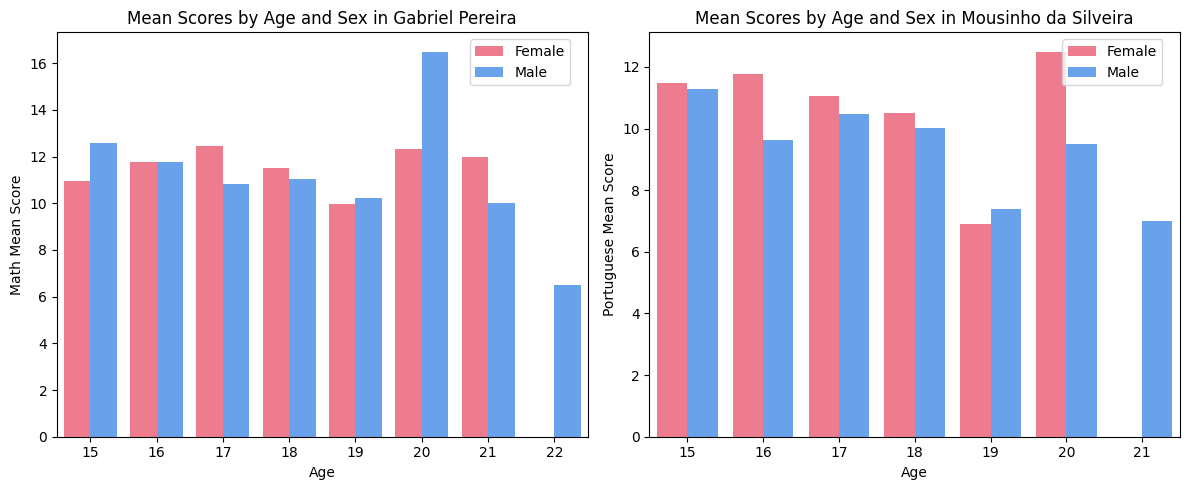

In [11]:
# Create subplots with 1 row and 2 columns
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Define the color palette for the plot
colors = {'Female': '#FF6B81', 'Male': '#54a0ff'}

# Plot the first bar plot on the first subplot
sns.barplot(data=df_mean_scores, x='age', y='mean_score', hue='sex', palette=colors, ax=axs[0])
axs[0].set_title('Mean Scores by Age and Sex in Gabriel Pereira')
axs[0].set_xlabel('Age')
axs[0].set_ylabel('Math Mean Score')
axs[0].legend(loc='upper right', bbox_to_anchor=(0.98, 1))

# Plot the second bar plot on the second subplot
sns.barplot(data=df_mean_scores1, x='age', y='mean_score', hue='sex',
            palette=colors, ax=axs[1])
axs[1].set_title('Mean Scores by Age and Sex in Mousinho da Silveira')
axs[1].set_xlabel('Age')
axs[1].set_ylabel('Portuguese Mean Score')
axs[1].legend(loc='upper right', bbox_to_anchor=(0.98, 1))

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

Motivation
* Different schools might have different resources that might cause some variation in the test scores.

Observations
* Based on initial inspection, Mousinho da Silveria school students scored on average higher scores compared to students at Gabriel Pereira school.

## 5) Is there a diference in scores by family size between gender and age?

In [12]:
# Filter the DataFrame for math and Portuguese scores separately
LE3_famsize = df[df['famsize'] == 'LE3']
GT3_famsize = df[df['famsize'] == 'GT3']

# Calculate the mean scores for each gender and subject
LE3_scores_mean = LE3_famsize.groupby(['sex','age'])['G3'].mean()

# Create a DataFrame from the mean scores
df_mean_scores = pd.DataFrame(LE3_scores_mean).reset_index()
df_mean_scores.columns = ['sex', 'age', 'mean_score']
# Replace 'F' with 'Female' and 'M' with 'Male' in the age column
df_mean_scores['sex'] = df_mean_scores['sex'].replace({'F': 'Female', 'M': 'Male'})
df_mean_scores.head(n = 5)

,sex,age,mean_score
0,Female,15,10.958333
1,Female,16,11.609756
2,Female,17,12.475000
3,Female,18,12.621622
4,Female,19,8.750000


In [13]:
GT3_scores_mean = GT3_famsize.groupby(['sex','age'])['G3'].mean()

# Create a DataFrame from the mean scores
df_mean_scores1 = pd.DataFrame(GT3_scores_mean).reset_index()
df_mean_scores1.columns = ['sex', 'age', 'mean_score']
# Replace 'F' with 'Female' and 'M' with 'Male' in the age column
df_mean_scores1['sex'] = df_mean_scores1['sex'].replace({'F': 'Female', 'M': 'Male'})
df_mean_scores1.head(n =5)

,sex,age,mean_score
0,Female,15,11.042254
1,Female,16,11.838983
2,Female,17,11.946565
3,Female,18,10.511111
4,Female,19,9.000000


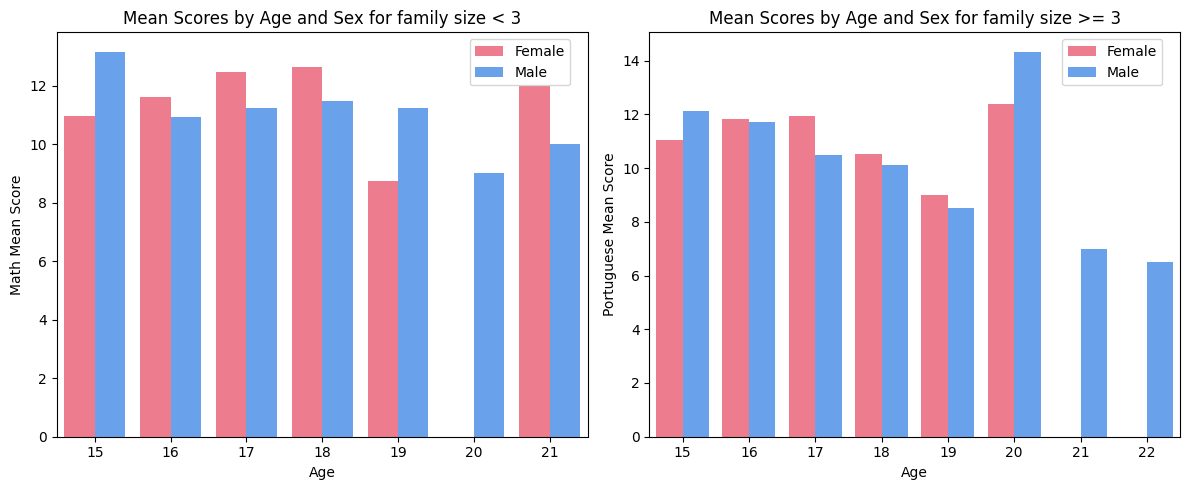

In [14]:
# Create subplots with 1 row and 2 columns
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Define the color palette for the plot
colors = {'Female': '#FF6B81', 'Male': '#54a0ff'}

# Plot the first bar plot on the first subplot
sns.barplot(data=df_mean_scores, x='age', y='mean_score', hue='sex',
            palette=colors, ax=axs[0])
axs[0].set_title('Mean Scores by Age and Sex for family size < 3')
axs[0].set_xlabel('Age')
axs[0].set_ylabel('Math Mean Score')
axs[0].legend(loc='upper right', bbox_to_anchor=(0.98, 1))

# Plot the second bar plot on the second subplot
sns.barplot(data=df_mean_scores1, x='age', y='mean_score', hue='sex',
            palette=colors, ax=axs[1])
axs[1].set_title('Mean Scores by Age and Sex for family size >= 3')
axs[1].set_xlabel('Age')
axs[1].set_ylabel('Portuguese Mean Score')
axs[1].legend(loc='upper right', bbox_to_anchor=(0.98, 1))

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

Motivation
* It is believed that with larger mean family size might imply lesser attention and resources being dedicated to the students.
Observation
* Students with family size < 3 might have higher mean score compared to the family size >= 3.

## 6) Is there a diference in scores by Mother/Father Education between gender and age?

Mother Education (Medu)

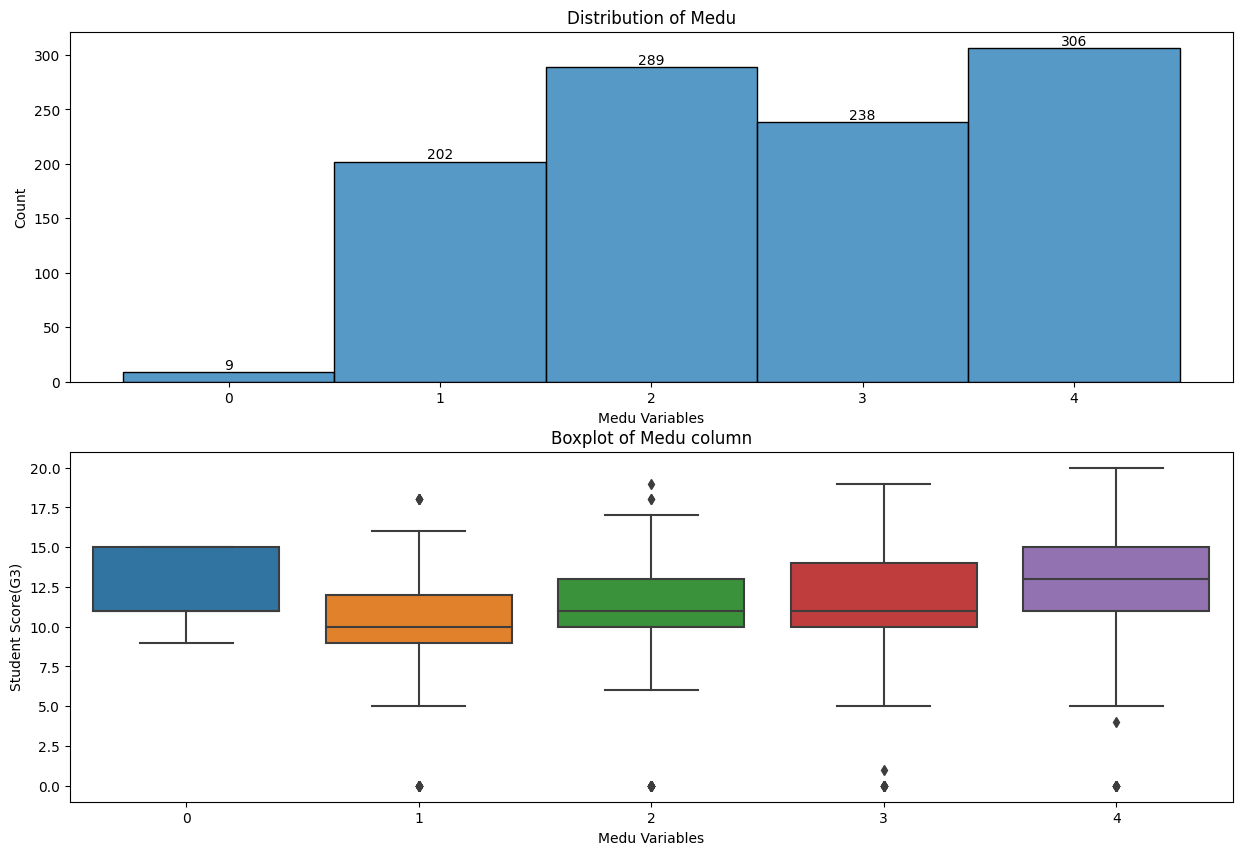

In [15]:
plot_hist_and_box("Medu", df)

Father Education (Fedu)

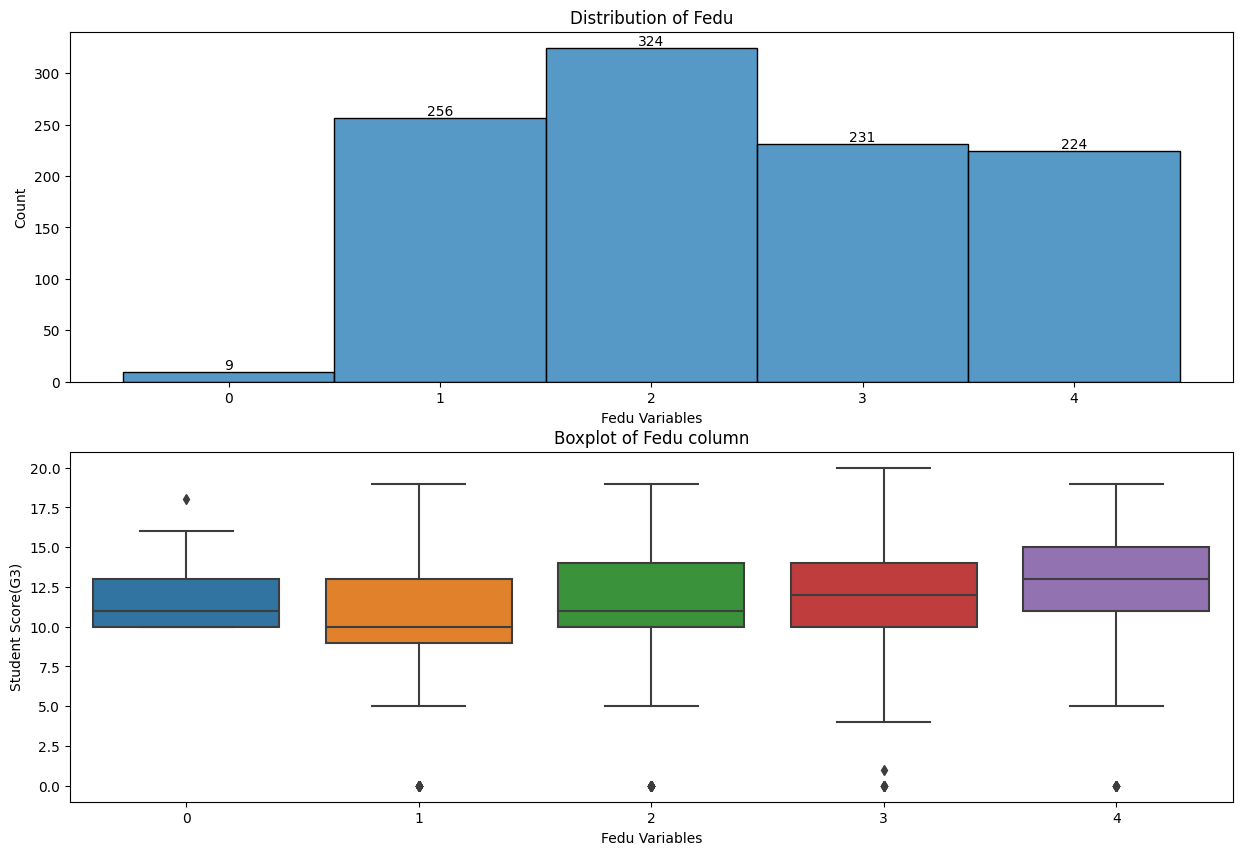

In [16]:
plot_hist_and_box("Fedu", df)

Observations
* From both plots, we could see that the higher the father and mother education, the higher in the students' mean score.

## 7) How does travel time affect the students' scores?

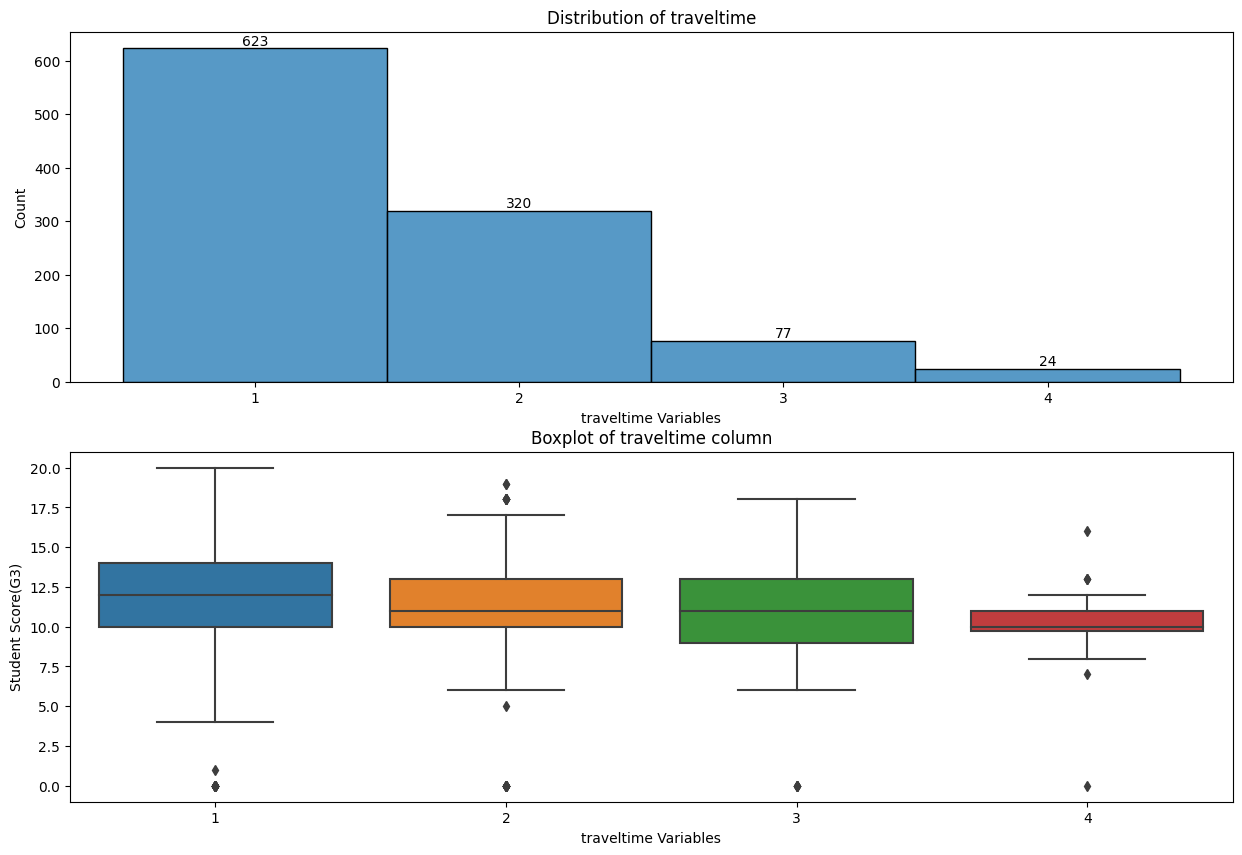

In [17]:
plot_hist_and_box("traveltime", df)

Observations
* We could see that the longer the traveltime, the lower the mean of the students' score.

## 8) How does studytime affect the students' scores?


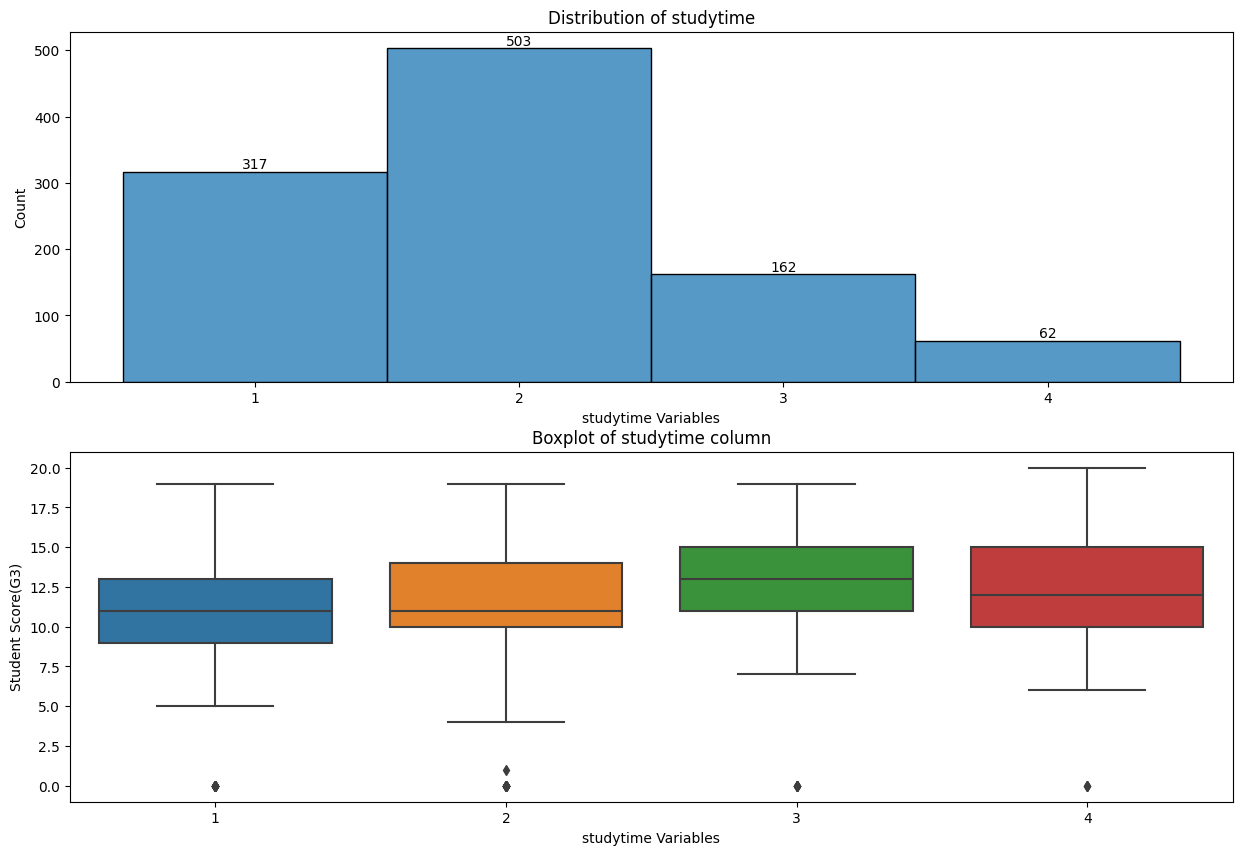

In [18]:
plot_hist_and_box("studytime", df)

Observations
* As the study time of the students increase from 1 to 3, we could see siginficant improvement in the mean score of the student.
* However, in category 4, there is a drop in the mean score of the student.

## 9) What is the distribution of the binary variables 16 to 23 like?


binary variables 16 to 23 correspond to schooldup, famsup, paid, activities, nursery, higher, internet and romantic

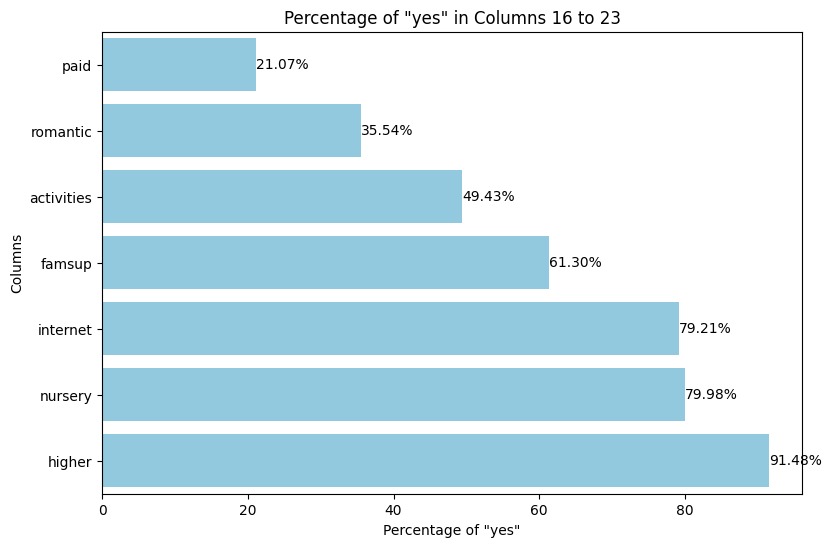

In [37]:
# Assuming the DataFrame is named 'df'
columns_to_check = df.columns[16:24]  # Select columns from 16 to 23 (inclusive)

# Calculate the percentage of 'yes' for each column
percentage_yes = {}
for column in columns_to_check:
    counts = df[column].value_counts()
    if 'yes' in counts.index:
        percentage = (counts['yes'] / counts.sum()) * 100
        percentage_yes[column] = percentage

# Convert the percentage_yes dictionary into a DataFrame
df_percentages = pd.DataFrame.from_dict(percentage_yes, orient='index', columns=['Percentage'])
df_percentages.sort_values(by='Percentage', ascending=True, inplace=True)

# Plotting the horizontal bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Percentage', y=df_percentages.index, data=df_percentages, color='skyblue')
plt.xlabel('Percentage of "yes"')
plt.ylabel('Columns')
plt.title('Percentage of "yes" in Columns 16 to 23')

# Display percentage values on y-axis (ytick)
for i, percentage in enumerate(df_percentages['Percentage']):
    ax.text(percentage, i, f'{percentage:.2f}%', va='center')

# Adjust x-axis width
plt.subplots_adjust(left=0.2)
plt.show()

Observation
* There are sufficient "yes" and "no" points for the machine learning model to learn from.
* Insufficient data points are not an issue here.

## 10) How does quality of family relationship affect students' score?

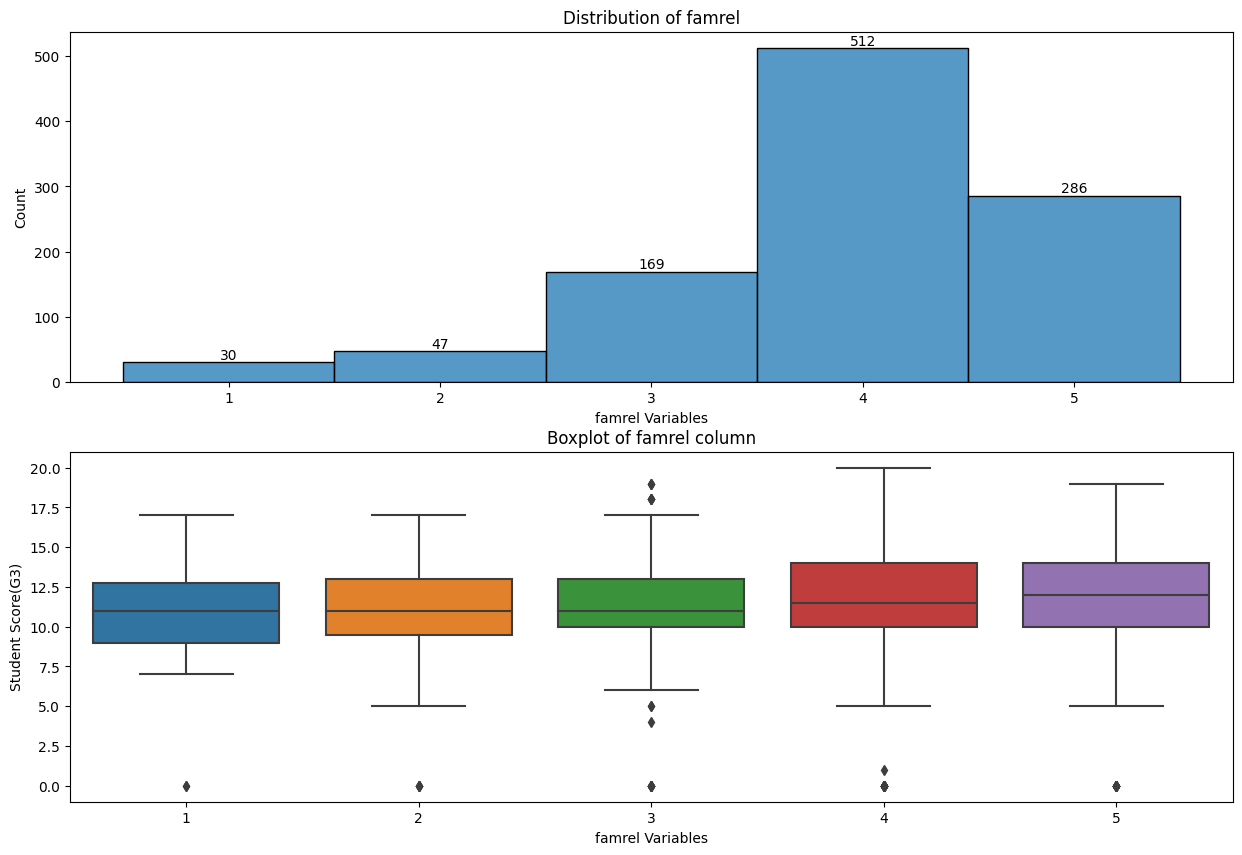

In [19]:
plot_hist_and_box("famrel", df)

Observation
* There is the slight increase in the mean student score as the family relationship increases.

## 11) How does the amount of freetime affect the students' score?

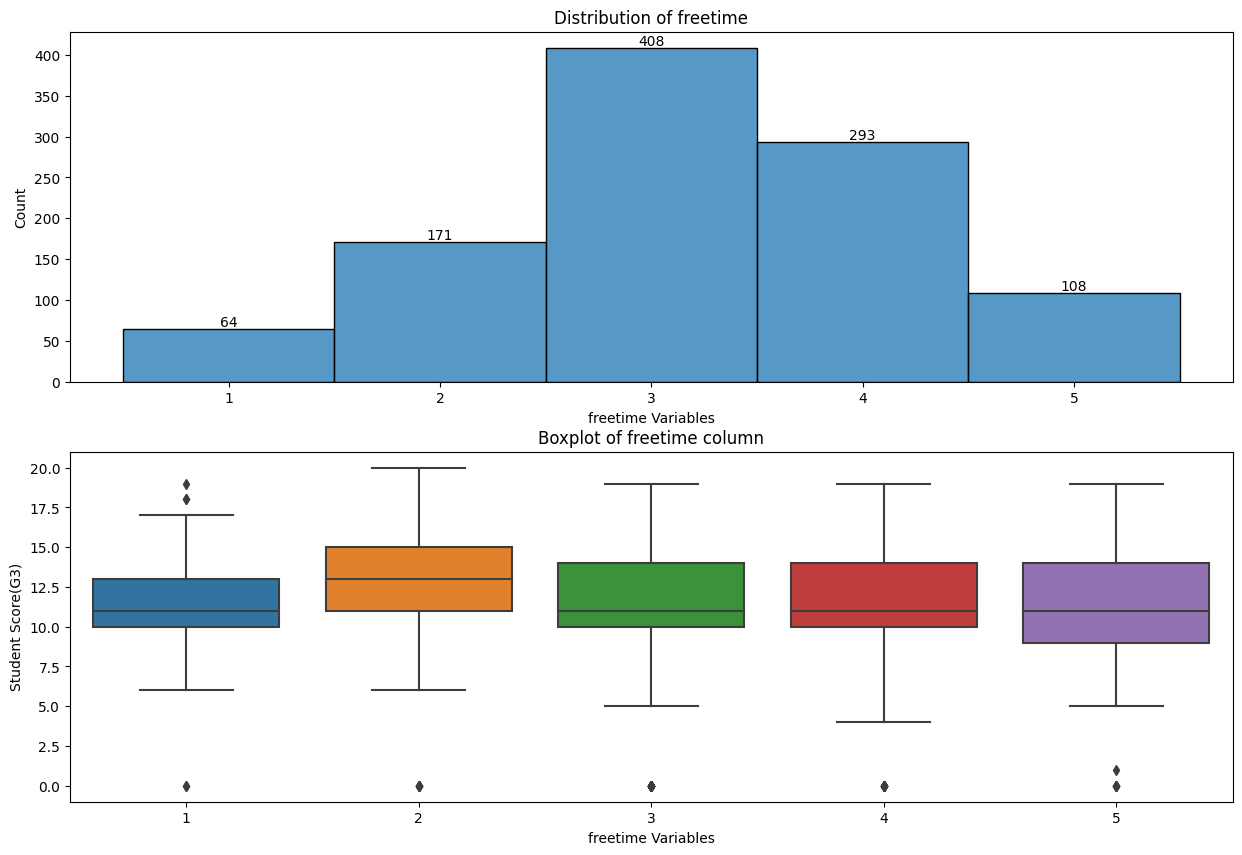

In [20]:
plot_hist_and_box("freetime", df)

Observation
* It seems that the amount of freetime does not affect the mean students' score.

## 12) How does the going out with friends affect the scores?

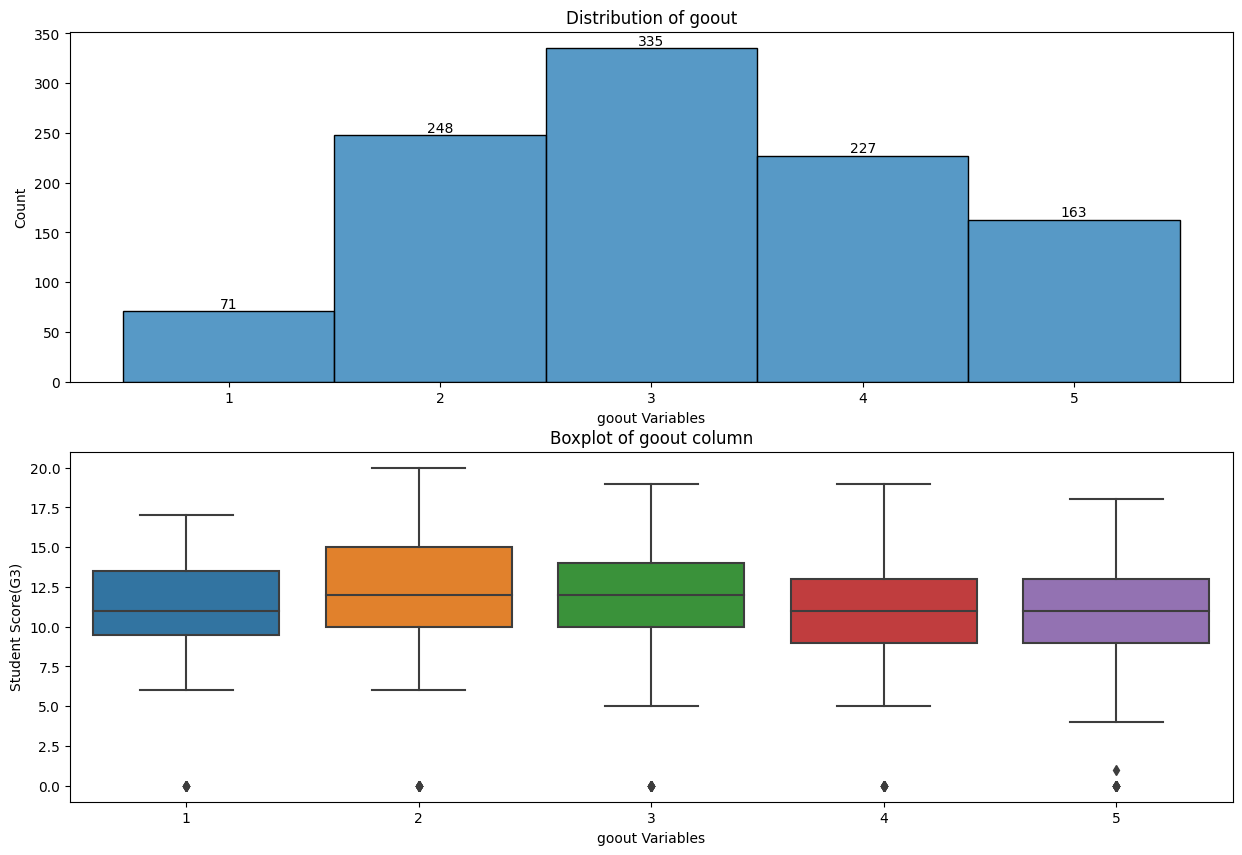

In [21]:
plot_hist_and_box("goout", df)

Observation
* There seems to be no relationship between going out with friends with the friends score.

## 13) How does the alcohol consumption affect the score?



workday alcohol consumption (Dalc)

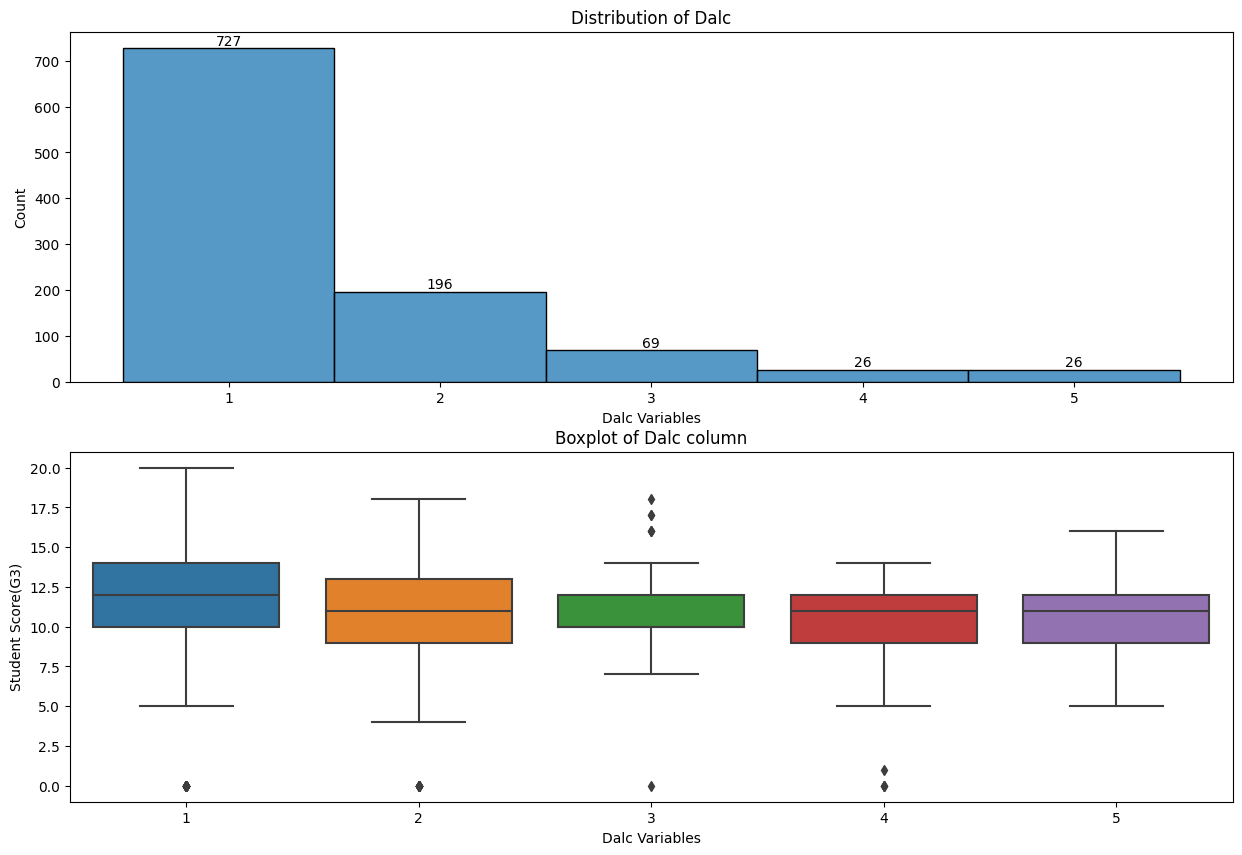

In [22]:
plot_hist_and_box("Dalc", df)

Observation
* There seems to be no relationship between the workday alcohol consumption with the student mean score.

Walc - weekend alcohol consumption

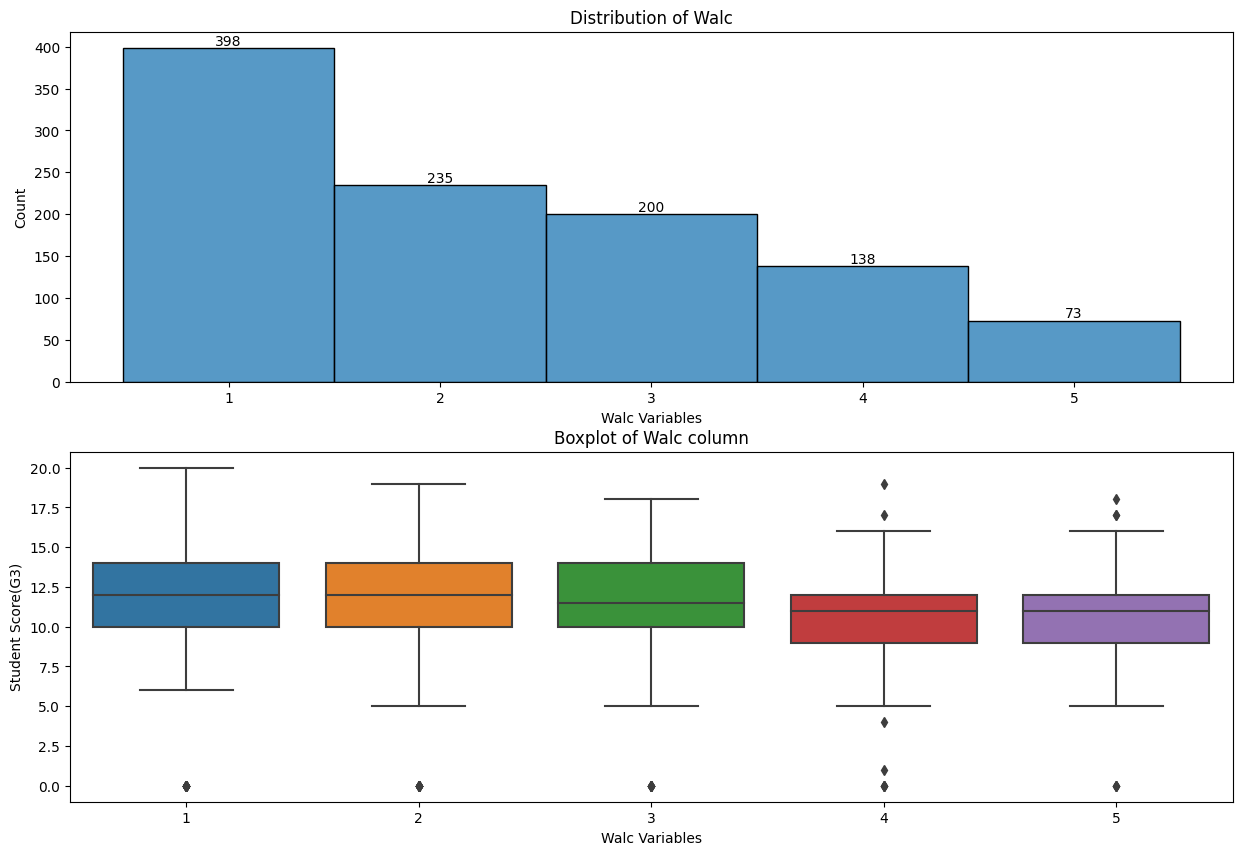

In [23]:
plot_hist_and_box("Walc", df)

## 14) How does health affect the students' score?

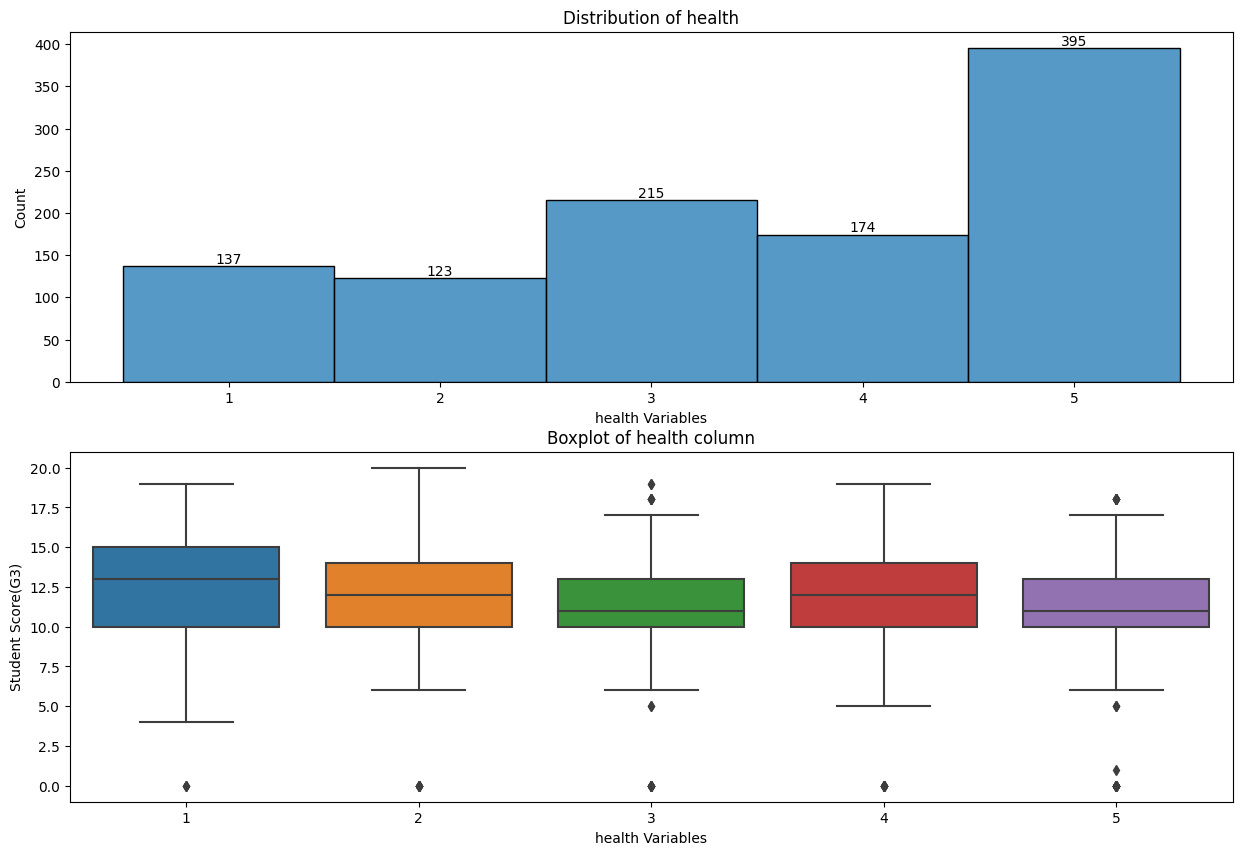

In [24]:
plot_hist_and_box("health", df)

Observation
* There is no obvious relationship between the health condition and the students'score.

## 15) How does number of days absent affect the students' score?

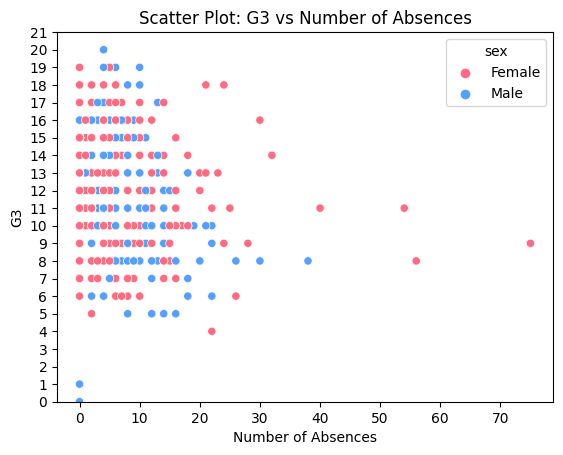

In [30]:
# Assuming the DataFrame is named 'df'
df1 = df
# Define the color palette for the plot
colors = {'Female': '#FF6B81', 'Male': '#54a0ff'}
df1['sex'] = df1['sex'].replace({'F': 'Female', 'M': 'Male'})
sns.scatterplot(data=df, x='absences', y='G3', hue='sex',palette=colors)
plt.xlabel('Number of Absences')
plt.ylabel('G3')
plt.title('Scatter Plot: G3 vs Number of Absences')
plt.ylim(0, 20)
plt.yticks(range(0, 22, 1))
plt.show()

Observation
* It seems that the number of days being absent is invariant to the G3 score.